In [24]:
#Habilitar si usas google colab

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd

# Lectura de la data

In [5]:
# Utilizando google colab
#data = pd.read_csv('/content/drive/MyDrive/IA/PracticaCalificada2-CC421/train.csv', chunksize=42000000)

# Desde local (jupyter notebook)
data = pd.read_csv('train.csv', chunksize=4200000)

In [6]:
data.get_chunk()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
4199995,2011-12-17 16:19:00.00000087,6.5,2011-12-17 16:19:00 UTC,-73.983677,40.738022,-73.968615,40.758562,2
4199996,2012-12-03 22:08:40.0000009,8.0,2012-12-03 22:08:40 UTC,-73.988328,40.743102,-73.979573,40.727320,1
4199997,2013-02-28 08:52:00.000000237,13.5,2013-02-28 08:52:00 UTC,-73.978873,40.740745,-73.982867,40.756662,1
4199998,2014-02-16 00:58:42.0000004,9.5,2014-02-16 00:58:42 UTC,-73.967985,40.802182,-73.982312,40.774868,3


In [7]:
df = data.get_chunk() 

In [8]:
print(df.head())

                                   key  fare_amount          pickup_datetime  \
4200000   2010-04-04 15:12:00.00000054          4.1  2010-04-04 15:12:00 UTC   
4200001    2010-06-06 08:56:44.0000001          4.5  2010-06-06 08:56:44 UTC   
4200002   2013-09-29 23:33:00.00000049          6.0  2013-09-29 23:33:00 UTC   
4200003  2014-05-30 22:07:00.000000256         18.5  2014-05-30 22:07:00 UTC   
4200004   2009-01-24 01:06:00.00000033          9.3  2009-01-24 01:06:00 UTC   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
4200000        -73.971627        40.760173         -73.965148   
4200001        -73.992702        40.758301         -73.992084   
4200002        -73.970287        40.784172         -73.969365   
4200003        -73.971745        40.757447         -73.918550   
4200004        -74.002383        40.739648         -73.987158   

         dropoff_latitude  passenger_count  
4200000         40.766517                1  
4200001         40.749355             

# Preprocesamiento de la data

Se cuentan las filas con valores nulos, como estás representan una cantidad infíma
simplemente se eliminarán

In [9]:
print(df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    21
dropoff_latitude     21
passenger_count       0
dtype: int64


In [10]:
df.dropna(inplace = True)
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [12]:
df['pickup_hour'] =df['pickup_datetime'].dt.hour

In [13]:
print(df['pickup_hour'])

4200000    15
4200001     8
4200002    23
4200003    22
4200004     1
           ..
8399995     5
8399996    10
8399997     1
8399998    20
8399999     8
Name: pickup_hour, Length: 4199979, dtype: int64


In [14]:
print(df['passenger_count'].value_counts())

1      2904751
2       620918
5       296684
3       184601
4        89103
6        89069
0        14848
208          2
7            2
51           1
Name: passenger_count, dtype: int64


In [15]:
df.loc[df.passenger_count > 7, 'passenger_count'] = 7

In [16]:
print(df['passenger_count'].value_counts())

1    2904751
2     620918
5     296684
3     184601
4      89103
6      89069
0      14848
7          5
Name: passenger_count, dtype: int64


In [17]:
print(df.dtypes)
print(df.head())

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
pickup_hour                   int64
dtype: object
                                   key  fare_amount     pickup_datetime  \
4200000   2010-04-04 15:12:00.00000054          4.1 2010-04-04 15:12:00   
4200001    2010-06-06 08:56:44.0000001          4.5 2010-06-06 08:56:44   
4200002   2013-09-29 23:33:00.00000049          6.0 2013-09-29 23:33:00   
4200003  2014-05-30 22:07:00.000000256         18.5 2014-05-30 22:07:00   
4200004   2009-01-24 01:06:00.00000033          9.3 2009-01-24 01:06:00   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
4200000        -73.971627        40.760173         -73.965148   
4200001        -73.992702        40.758301         -73.992084   
4200002        -

Se usarán las siguientes carácteristicas


In [18]:
X = df.drop(['key','pickup_datetime','fare_amount'],1)
y = df.fare_amount
print(X)

         pickup_longitude  pickup_latitude  dropoff_longitude  \
4200000        -73.971627        40.760173         -73.965148   
4200001        -73.992702        40.758301         -73.992084   
4200002        -73.970287        40.784172         -73.969365   
4200003        -73.971745        40.757447         -73.918550   
4200004        -74.002383        40.739648         -73.987158   
...                   ...              ...                ...   
8399995        -73.963641        40.768372         -73.861692   
8399996        -74.004860        40.746680         -73.983702   
8399997        -73.989762        40.729890         -73.976812   
8399998        -73.991152        40.745317         -73.994445   
8399999        -73.984518        40.757357         -74.009730   

         dropoff_latitude  passenger_count  pickup_hour  
4200000         40.766517                1           15  
4200001         40.749355                1            8  
4200002         40.795512                6   

In [19]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler(quantile_range = (0.1,0.9)).fit(X)
X = transformer.transform(X)

In [20]:
print(X)

[[ 3.84899116e-01  7.54100000e-03  9.26541593e-02  1.33570000e-02
   0.00000000e+00  1.00000000e+00]
 [-4.10916529e-01  5.66900000e-03 -7.35950037e-02 -3.80500000e-03
   0.00000000e+00 -6.00000000e+00]
 [ 4.35499019e-01  3.15400000e-02  6.66268085e-02  4.23520000e-02
   5.00000000e+00  9.00000000e+00]
 ...
 [-2.99898830e-01 -2.27420000e-02  2.06638772e-02 -1.20300000e-02
   2.00000000e+00 -1.30000000e+01]
 [-3.52386790e-01 -7.31500000e-03 -8.81671106e-02  3.32500000e-03
   0.00000000e+00  6.00000000e+00]
 [-1.01879507e-01  4.72500000e-03 -1.82506228e-01 -4.47270000e-02
   0.00000000e+00 -6.00000000e+00]]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
'''
reg_decision_model=DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
'''
regressor1 = DecisionTreeRegressor(random_state=0)
regressor2 = DecisionTreeRegressor(random_state=0, max_depth=13,
                                   max_features='auto',
                                   splitter='best')

regressor1.fit(X_train,y_train)
regressor2.fit(X_train,y_train)



DecisionTreeRegressor(max_depth=13, max_features='auto', random_state=0)

In [148]:
print(tuning_model.best_params_)
print(tuning_model.best_score_)
{'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}

{'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-76.97502434727058


In [29]:
y1 = regressor1.predict(X_test)
y2 = regressor2.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

print(mean_absolute_error(y_test, y1))
print(mean_absolute_error(y_test, y2))
print(median_absolute_error(y_test, y1))
print(median_absolute_error(y_test, y2))
print(explained_variance_score(y_test,y1))
print(explained_variance_score(y_test,y2))

print(r2_score(y_test, y1))
print(r2_score(y_test, y2))

2.79527685744311
3.009050348096883
1.5
2.3039681809910464
0.6141425310485075
0.7051414453995688
0.614098342337029
0.7051412167665109


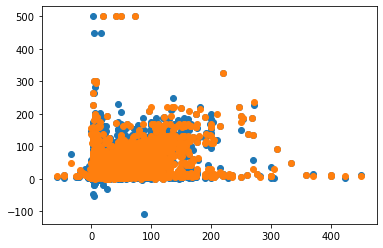

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y1)
plt.scatter(y_test,y2)